In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import mapclassify
from drawarrow import fig_arrow
from pyfonts import load_bunny_font, set_default_font

In [21]:
font = load_bunny_font("Candal")
set_default_font(font)

In [22]:
lis = gpd.read_file("C2021_SECCOES_1106.gpkg")

In [23]:
census_col_lis = ["N_RHABITUAL_1_2_DIV", "N_RHABITUAL_5_MAIS_DIV"]
df = lis[census_col_lis + ["DTMNFRSEC21", "geometry"]].dissolve(by="DTMNFRSEC21", aggfunc="sum").reset_index()
lis_parishes = lis[census_col_lis + ["DTMNFR21", "geometry"]].dissolve(by="DTMNFR21", aggfunc="sum").reset_index()

In [24]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   DTMNFRSEC21             522 non-null    object  
 1   geometry                522 non-null    geometry
 2   N_RHABITUAL_1_2_DIV     522 non-null    float64 
 3   N_RHABITUAL_5_MAIS_DIV  522 non-null    float64 
dtypes: float64(2), geometry(1), object(1)
memory usage: 16.4+ KB


In [25]:
df.head(2)

,DTMNFRSEC21,geometry,N_RHABITUAL_1_2_DIV,N_RHABITUAL_5_MAIS_DIV
0,110601001,"POLYGON ((-92539.294 -106749.953, -92649.475 -...",148.0,28.0
1,110601002,"POLYGON ((-92753.313 -106468.754, -92755.634 -...",150.0,31.0


In [26]:
lis_parishes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   DTMNFR21                24 non-null     object  
 1   geometry                24 non-null     geometry
 2   N_RHABITUAL_1_2_DIV     24 non-null     float64 
 3   N_RHABITUAL_5_MAIS_DIV  24 non-null     float64 
dtypes: float64(2), geometry(1), object(1)
memory usage: 900.0+ bytes


In [27]:
lis_parishes.head(2)

,DTMNFR21,geometry,N_RHABITUAL_1_2_DIV,N_RHABITUAL_5_MAIS_DIV
0,110601,"POLYGON ((-92774.524 -106700.808, -92791.33 -1...",1606.0,557.0
1,110602,"POLYGON ((-92234.77 -106896.762, -92234.772 -1...",1822.0,723.0


In [28]:
df["x_group"] = df[["N_RHABITUAL_1_2_DIV"]].apply(mapclassify.Quantiles.make(rolling=True, k = 3))
df["y_group"] = df[["N_RHABITUAL_5_MAIS_DIV"]].apply(mapclassify.Quantiles.make(rolling=True, k = 3))
df["xy_group"] = df["x_group"].astype(str) + "-" + df["y_group"].astype(str)

In [29]:
color_dict = {
    "0-2": "#41afe7", 
    "0-1": "#9ed0e8",
    "0-0": "#fdf1e3",   
    "1-2": "#497b90",
    "1-1": "#ae988b", 
    "1-0": "#f4b083", 
    "2-2": "#5a473c",
    "2-1": "#a55e33",
    "2-0": "#ea731f" 
}

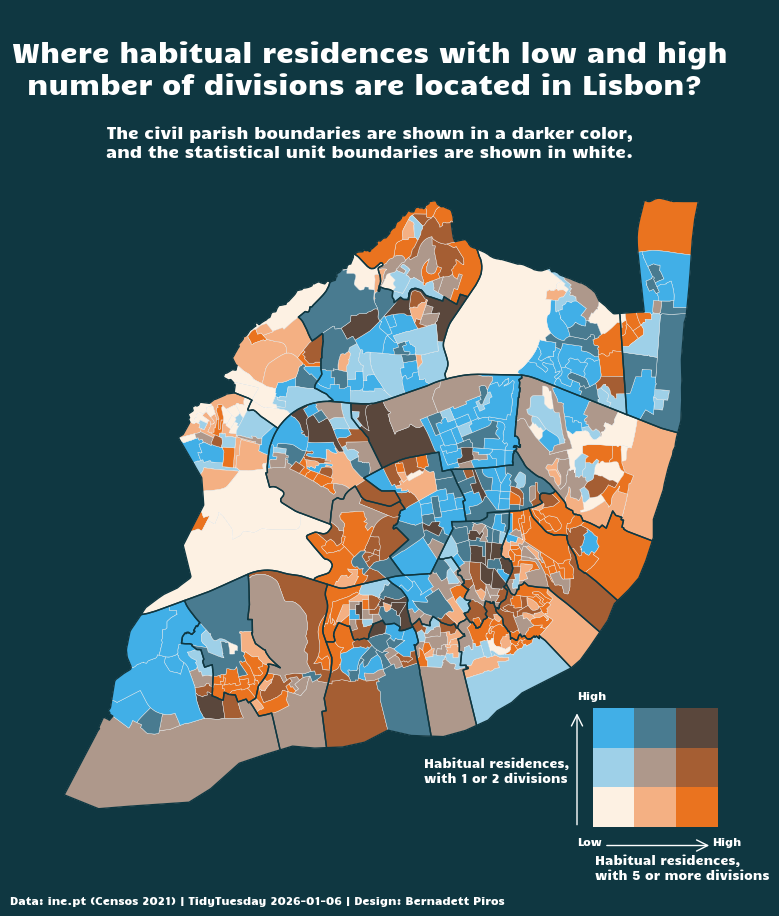

In [30]:
fig, ax = plt.subplots(figsize=(9, 9), facecolor="#0F3741")

# bivariate data
df.plot(   
    color=df["xy_group"].map(color_dict), 
    edgecolor = "white",
    linewidth = 0.3,
    ax = ax       
)

lis_parishes.plot(
    edgecolor="#0F3741",
    linewidth=1,
    facecolor="none",
    ax=ax)

ax.axis("off")

# custom legend
legend_elements = []
for key, value in color_dict.items():
    legend_elements.append(Patch(facecolor=value, edgecolor=None))
ax.legend(
    handles=legend_elements, 
    loc="lower right",      
    ncol=3, 
    frameon=False,
    handletextpad=0, 
    labelspacing = 0, 
    columnspacing = 0,
    handlelength=3,
    handleheight=4,    
)

fig.text(0.56, 0.185, "Habitual residences,\nwith 1 or 2 divisions", color="white",  size=9)
fig.text(0.75, 0.078, "Habitual residences,\nwith 5 or more divisions", color="white", size=9)

fig.text(0.73, 0.278, "High", color="white",  fontsize=8)
fig.text(0.73, 0.115, "Low", color="white", fontsize=8)
fig.text(0.88, 0.115, "High", color="white", fontsize=8)

fig_arrow(
   tail_position=(0.73, 0.135),
   head_position=(0.73, 0.265),
   fill_head=False,
   color="white",
)

fig_arrow(
   tail_position=(0.76, 0.115),
   head_position=(0.88, 0.115),
   fill_head=False,
   color="white",
)

# Add title
fig.text(0.5, 0.95, "\nWhere habitual residences with low and high\nnumber of divisions are located in Lisbon? ", color="white", size=20, ha="center")

fig.text(0.5, 0.88, "The civil parish boundaries are shown in a darker color,\nand the statistical unit boundaries are shown in white.", color="white", size=12, ha="center")

# Add caption
fig.text(0.1, 0.05, "Data: ine.pt (Censos 2021) | TidyTuesday 2026-01-06 | Design: Bernadett Piros", size=8, color="white")

# Show the plot
plt.show()

#fig.savefig("2026-01-06.png", bbox_inches="tight", pad_inches=0.2)